In [1]:
import torch
import torch.nn as nn

In [2]:
from SimpleEEnvironment import BitFlipEnvironment

In [3]:
env = BitFlipEnvironment(n_bits=4)

In [4]:
import pybullet_envs
import gym
import numpy as np
from gym import wrappers
from sac_again import SoftActorCritic

In [5]:
env = gym.make('InvertedPendulumBulletEnv-v0')
print(env.action_space, env.observation_space.shape)
env.reset()

Box(-1.0, 1.0, (1,), float32) (5,)
argv[0]=
argv[0]=


pybullet build time: Nov 28 2023 23:48:36


array([ 0.        ,  0.        ,  0.99502922, -0.09958344,  0.        ])

In [6]:
sac = SoftActorCritic(env.observation_space.shape[0], action_dim=env.action_space.shape[0], hidden_size=64)

In [7]:
best_score = env.reward_range[0]
score_history = []
load_checkpoint = False

In [8]:
n_episodes = 100
max_size = 10_000
batch_size = 64
learning_freq = 32

In [9]:
from replay_buffer import ReplayBuffer

replay_buffer = ReplayBuffer(max_size)

In [10]:
def play_and_record(env, agent, buffer):
    state = env.reset()
    done = False
    score = 0
    while not done:
        action = sac.choose_action(state)
        next_state, reward, done, _ = env.step(action)
        score += reward
        buffer.add(state, action, reward, next_state, done)


        if len(buffer) > batch_size:
            batch = replay_buffer.sample(batch_size)
            sac.learning_step(batch)
            
        state = next_state
    
    return score

In [11]:
n_episodes = 1000

In [12]:
env.reset()
env.render()

array([], dtype=float64)

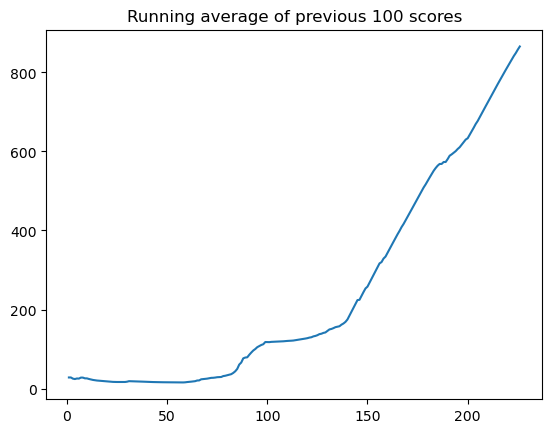

 23%|██▎       | 228/1000 [18:22<1:02:12,  4.83s/it]


KeyboardInterrupt: 

In [13]:
from tqdm import tqdm
from utils import plot_learning_curve

for i in tqdm(range(n_episodes)):
    score = play_and_record(env, sac, replay_buffer)
    # batch = replay_buffer.sample(batch_size)
    # sac.learning_step(batch)
    score_history.append(score)
    avg_score = np.mean(score_history[-100:])
    if avg_score > best_score:
        best_score = avg_score
        # sac.save_checkpoint()
    if i % 25 == 0 and i > 0:
        print(f"iteration {i} score {score:.3f} avg_score {avg_score:.3f}")
        plot_learning_curve(i + 1, score_history) 

In [ ]:
for i in tqdm(range(250)):
    score = play_and_record(env, sac, replay_buffer)
    batch = replay_buffer.sample(batch_size)
    sac.learning_step(batch)
    score_history.append(score)
    avg_score = np.mean(score_history[-100:])
    if avg_score > best_score:
        best_score = avg_score
        sac.save_checkpoint()
    if i % 250 == 0 and i > 0:
        print(f"iteration {i} score {score:.3f} avg_score {avg_score:.3f}")
        plot_learning_curve(i + 1, score_history) 

100%|██████████| 250/250 [01:24<00:00,  2.97it/s]
